In [1]:
import numpy as np
import matplotlib.pyplot as plt
from regions import Regions
import regions
from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy import units as u

from smart_plotters.jwst_plots import JWSTCatalog, make_cat_use, make_brick_cat
from smart_plotters.cutout_plot import get_cutout_405, get_cutout_jwst_ice
from smart_plotters import cmd_plot

import importlib as imp

imp.reload(cmd_plot)

<module 'smart_plotters.cmd_plot' from '/blue/adamginsburg/savannahgramze/cloudc/smart-plotters/smart_plotters/cmd_plot.py'>

In [2]:
cat_use = make_cat_use()


In [3]:
reg_f = Regions.read('/orange/adamginsburg/jwst/cloudc/lactea-filament/lactea-filament/regions_/filament_short.region')
reg_c1 = Regions.read('/orange/adamginsburg/jwst/cloudc/lactea-filament/lactea-filament/regions_/cloudc1.region')
reg_c2 = Regions.read('/orange/adamginsburg/jwst/cloudc/lactea-filament/lactea-filament/regions_/cloudc2.region')
reg_d = Regions.read('/orange/adamginsburg/jwst/cloudc/lactea-filament/lactea-filament/regions_/cloudd.region')

In [4]:
reg_c1_ice = Regions.read('/orange/adamginsburg/jwst/cloudc/regions_/cloudc1_ice.reg')
reg_c2_ice = Regions.read('/orange/adamginsburg/jwst/cloudc/regions_/cloudc2_ice.reg')
reg_d_ice = Regions.read('/orange/adamginsburg/jwst/cloudc/regions_/cloudd_ice.reg')

In [5]:
pos_hmsfr = SkyCoord('17:46:21.4669695284', '-28:35:38.1118497742', unit=(u.hourangle, u.deg))

# Cloud C

In [6]:
ra = pos_hmsfr.ra - 25 *u.arcsec
dec = pos_hmsfr.dec + 20 *u.arcsec
pos_cloudc = SkyCoord(ra, dec)
l = 120*u.arcsec
w = 140*u.arcsec

cutout_cloudc = get_cutout_405(pos_cloudc, w, l)
cutout_nan = cutout_cloudc.data*np.nan
reg_cloudc = regions.RectangleSkyRegion(center=pos_cloudc, width=l, height=w, angle=0*u.deg)

cat_cloudc = JWSTCatalog(cat_use.table_region_mask([reg_cloudc], cutout_cloudc.wcs))

In [7]:
cat_c1_ice = JWSTCatalog(cat_use.table_region_mask(reg_c1_ice, cutout_cloudc.wcs))
cat_c2_ice = JWSTCatalog(cat_use.table_region_mask(reg_c2_ice, cutout_cloudc.wcs))
#JWSTCatalog.from_regions(cat_use, reg_c1_ice, cutout_cloudc.wcs)

In [8]:
cutout_ice_cloudc, cutout_ice_cloudc_ww = get_cutout_jwst_ice(pos_cloudc, w, l)
cutout_cloudc_nan = cutout_ice_cloudc*np.nan

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.23969360676372498..2.8978493646178114].


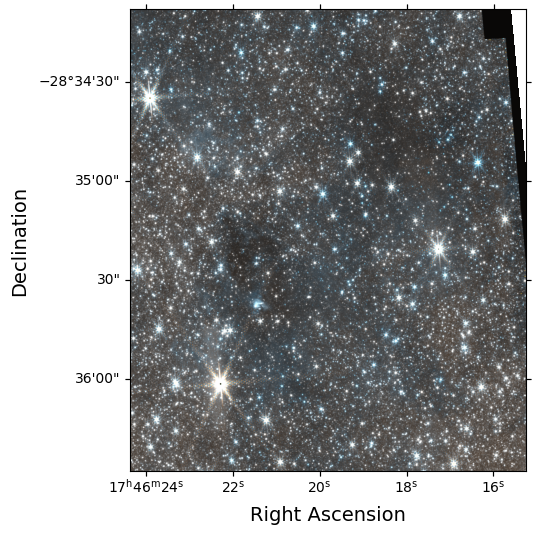

In [9]:
fig = plt.figure(figsize=(8, 6))
ax = plt.subplot(projection=cutout_ice_cloudc_ww)
ax.imshow(cutout_ice_cloudc.data)
ax.set_xlabel('Right Ascension', fontsize=14)
ax.set_ylabel('Declination', fontsize=14)

/orange/adamginsburg/miniconda3/envs/python312/lib/python3.12/site-packages/matplotlib/cbook.py:1719: UserWarning: Warning: converting a masked element to nan.
  return math.isfinite(val)


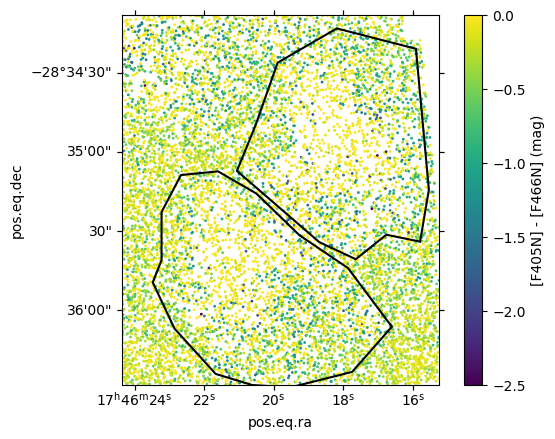

In [10]:
ax = plt.subplot(projection=cutout_ice_cloudc_ww)
ax.imshow(cutout_cloudc_nan)
im = ax.scatter(cat_cloudc.ra, cat_cloudc.dec, s=1, c=cat_cloudc.color('f405n', 'f466n'), cmap='viridis', vmin=-2.5, vmax=0, transform=ax.get_transform('world'))
#cat_cloudc.plot_position(ax=ax, transform=ax.get_transform('world'), s=1, c=cat_cloudc.color('f405n', 'f466n'), cmap='viridis', vmin=-2.5, vmax=0)
reg_c1_ice[0].to_pixel(cutout_ice_cloudc_ww).plot(ax=ax, edgecolor='k', facecolor='none', lw=1.5)
reg_c2_ice[0].to_pixel(cutout_ice_cloudc_ww).plot(ax=ax, edgecolor='k', facecolor='none', lw=1.5)
plt.colorbar(im, ax=ax, label='[F405N] - [F466N] (mag)')

/scratch/local/17883900/ipykernel_2217561/918352497.py:18: UserWarning: Adding colorbar to a different Figure <Figure size 640x480 with 2 Axes> than <Figure size 800x300 with 3 Axes> which fig.colorbar is called on.
  cbar = plt.colorbar(im, ax=ax2)


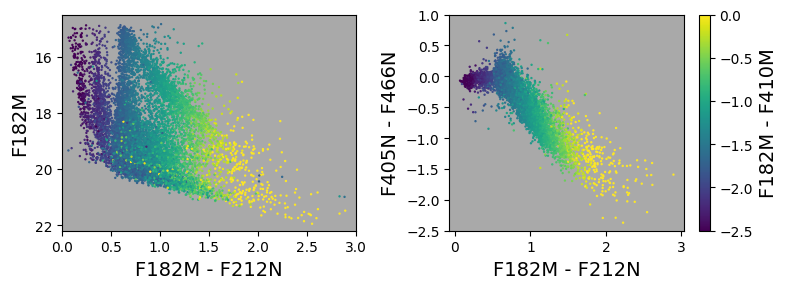

In [11]:
fig = plt.figure(figsize=(8, 3))

ax1 = plt.subplot(121)
ax1.set_facecolor('darkgrey')
cat_cloudc.plot_CMD('F182M', 'F212N', 'F182M', c=cat_cloudc.color('f182m', 'f410m'), ax=ax1, s=0.5, cmap='viridis', vmin=0.55, vmax=4.5)
ax1.set_xlabel('F182M - F212N', fontsize=14)
ax1.set_ylabel('F182M', fontsize=14)
ax1.set_xlim(0, 3)
ax1.set_ylim(22.2, 14.5)

ax2 = plt.subplot(122)
ax2.set_facecolor('darkgrey')
cat_cloudc.plot_CCD('F182M', 'F212N', 'F405N', 'F466N', c=cat_cloudc.color('f182m', 'f410m'), ax=ax2, s=0.5, cmap='viridis', vmin=0.55, vmax=4.5)
ax2.set_xlabel('F182M - F212N', fontsize=14)
ax2.set_ylabel('F405N - F466N', fontsize=14)
ax2.set_ylim(-2.5, 1)

cbar = plt.colorbar(im, ax=ax2)
cbar.set_label('F182M - F410M', fontsize=14)

plt.tight_layout()

/orange/adamginsburg/miniconda3/envs/python312/lib/python3.12/site-packages/matplotlib/cbook.py:1719: UserWarning: Warning: converting a masked element to nan.
  return math.isfinite(val)


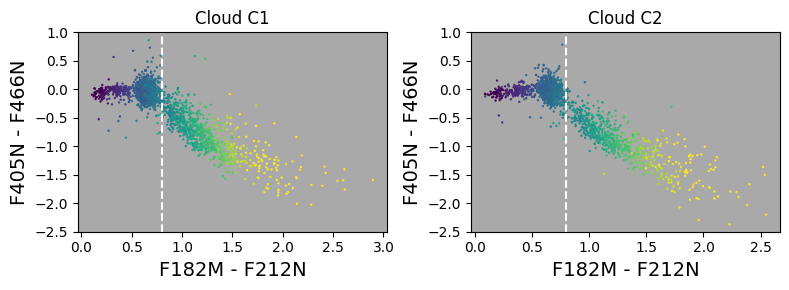

In [36]:
fig = plt.figure(figsize=(8, 3))

ax1 = plt.subplot(121)
ax1.set_facecolor('darkgrey')
cat_c1_ice.plot_CCD('F182M', 'F212N', 'F405N', 'F466N', c=cat_c1_ice.color('f182m', 'f410m'), ax=ax1, s=0.5, cmap='viridis', vmin=0.55, vmax=4.5)
ax1.set_xlabel('F182M - F212N', fontsize=14)
ax1.set_ylabel('F405N - F466N', fontsize=14)
ax1.set_ylim(-2.5, 1)
ax1.set_title('Cloud C1')
ax1.axvline(0.8, color='white', linestyle='--')

ax2 = plt.subplot(122)
ax2.set_facecolor('darkgrey')
cat_c2_ice.plot_CCD('F182M', 'F212N', 'F405N', 'F466N', c=cat_c2_ice.color('f182m', 'f410m'), ax=ax2, s=0.5, cmap='viridis', vmin=0.55, vmax=4.5)
ax2.set_xlabel('F182M - F212N', fontsize=14)
ax2.set_ylabel('F405N - F466N', fontsize=14)
ax2.set_ylim(-2.5, 1)
ax2.set_title('Cloud C2')
ax2.axvline(0.8, color='white', linestyle='--')

plt.tight_layout()

## Barebones

In [25]:
reg_c1_restricted = Regions.read('/orange/adamginsburg/jwst/cloudc/regions_/cloudc1_restricted.reg')
reg_c2_restricted = Regions.read('/orange/adamginsburg/jwst/cloudc/regions_/cloudc2_restricted.reg')

/orange/adamginsburg/miniconda3/envs/python312/lib/python3.12/site-packages/matplotlib/cbook.py:1719: UserWarning: Warning: converting a masked element to nan.
  return math.isfinite(val)


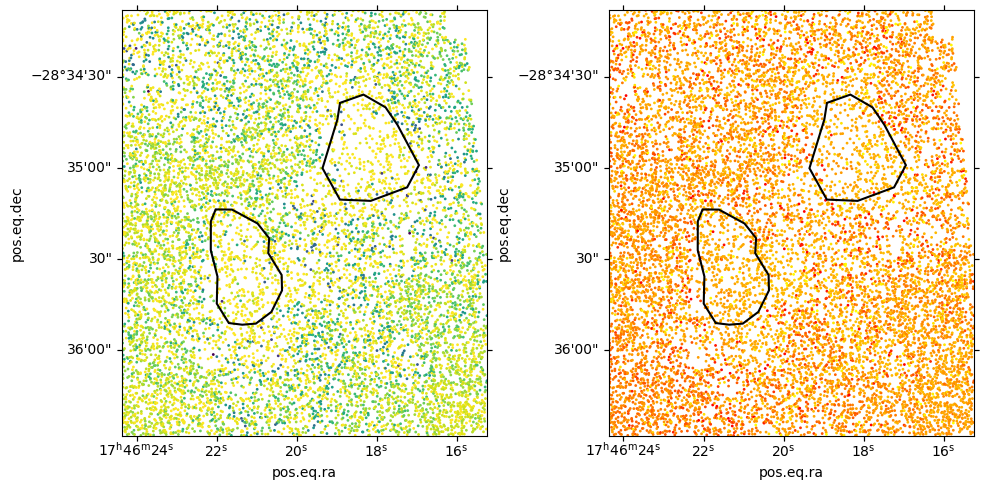

In [26]:
fig = plt.figure(figsize=(10, 5))

ax = plt.subplot(121, projection=cutout_ice_cloudc_ww)
ax.imshow(cutout_cloudc_nan)
im = ax.scatter(cat_cloudc.ra, cat_cloudc.dec, s=1, c=cat_cloudc.color('f405n', 'f466n'), cmap='viridis', vmin=-2.5, vmax=0, transform=ax.get_transform('world'))
#cat_cloudc.plot_position(ax=ax, transform=ax.get_transform('world'), s=1, c=cat_cloudc.color('f405n', 'f466n'), cmap='viridis', vmin=-2.5, vmax=0)
reg_c1_restricted[0].to_pixel(cutout_ice_cloudc_ww).plot(ax=ax, edgecolor='k', facecolor='none', lw=1.5)
reg_c2_restricted[0].to_pixel(cutout_ice_cloudc_ww).plot(ax=ax, edgecolor='k', facecolor='none', lw=1.5)
#plt.colorbar(im, ax=ax, label='[F405N] - [F466N] (mag)')

ax = plt.subplot(122, projection=cutout_ice_cloudc_ww)
ax.imshow(cutout_cloudc_nan)
im = ax.scatter(cat_cloudc.ra, cat_cloudc.dec, s=1, c=cat_cloudc.color('f187n', 'f405n'), cmap='autumn_r', vmin=0.5, vmax=4.5, transform=ax.get_transform('world'))
#cat_cloudc.plot_position(ax=ax, transform=ax.get_transform('world'), s=1, c=cat_cloudc.color('f405n', 'f466n'), cmap='viridis', vmin=-2.5, vmax=0)
reg_c1_restricted[0].to_pixel(cutout_ice_cloudc_ww).plot(ax=ax, edgecolor='k', facecolor='none', lw=1.5)
reg_c2_restricted[0].to_pixel(cutout_ice_cloudc_ww).plot(ax=ax, edgecolor='k', facecolor='none', lw=1.5)

plt.tight_layout()

In [27]:
cat_c1_restricted = JWSTCatalog(cat_use.table_region_mask(reg_c1_restricted, cutout_cloudc.wcs))
cat_c2_restricted = JWSTCatalog(cat_use.table_region_mask(reg_c2_restricted, cutout_cloudc.wcs))

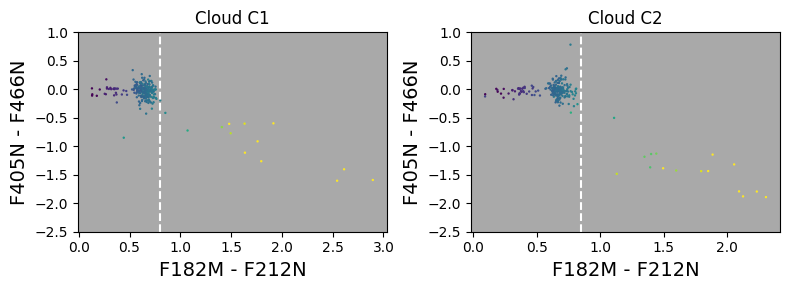

In [33]:
fig = plt.figure(figsize=(8, 3))

ax1 = plt.subplot(121)
ax1.set_facecolor('darkgrey')
cat_c1_restricted.plot_CCD('F182M', 'F212N', 'F405N', 'F466N', c=cat_c1_restricted.color('f182m', 'f410m'), ax=ax1, s=0.5, cmap='viridis', vmin=0.55, vmax=4.5)
ax1.set_xlabel('F182M - F212N', fontsize=14)
ax1.set_ylabel('F405N - F466N', fontsize=14)
ax1.set_ylim(-2.5, 1)
ax1.set_title('Cloud C1')
ax1.axvline(0.8, color='white', linestyle='--')

ax2 = plt.subplot(122)
ax2.set_facecolor('darkgrey')
cat_c2_restricted.plot_CCD('F182M', 'F212N', 'F405N', 'F466N', c=cat_c2_restricted.color('f182m', 'f410m'), ax=ax2, s=0.5, cmap='viridis', vmin=0.55, vmax=4.5)
ax2.set_xlabel('F182M - F212N', fontsize=14)
ax2.set_ylabel('F405N - F466N', fontsize=14)
ax2.set_ylim(-2.5, 1)
ax2.set_title('Cloud C2')
ax2.axvline(0.85, color='white', linestyle='--')

plt.tight_layout()

# Cloud D

In [6]:
ra = 266.61798916*u.deg - 85*u.arcsec
dec = -28.56350962*u.deg + 20*u.arcsec
pos_cloudd = SkyCoord(ra, dec, unit='deg')
# 266.61818185263087	-28.563878155421047
ld = 140*u.arcsec
wd = 140*u.arcsec

cutout_cloudd = get_cutout_405(pos_cloudd, wd, ld)
cutout_nan_d = cutout_cloudd.data*np.nan
reg_cloudd = regions.RectangleSkyRegion(center=pos_cloudd, width=ld, height=wd, angle=0*u.deg)

cat_cloudd = JWSTCatalog(cat_use.table_region_mask([reg_cloudd], cutout_cloudd.wcs))

In [7]:
reg_d_ice = Regions.read('/orange/adamginsburg/jwst/cloudc/regions_/cloudd_ice.reg')
cat_d_ice = JWSTCatalog(cat_use.table_region_mask(reg_d_ice, cutout_cloudd.wcs))


In [8]:
cutout_ice_cloudd, cutout_ice_cloudd_ww = get_cutout_jwst_ice(pos_cloudd, wd, ld)
cutout_cloudd_nan = cutout_ice_cloudd*np.nan

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.2104782785896682..2.8738750625148426].


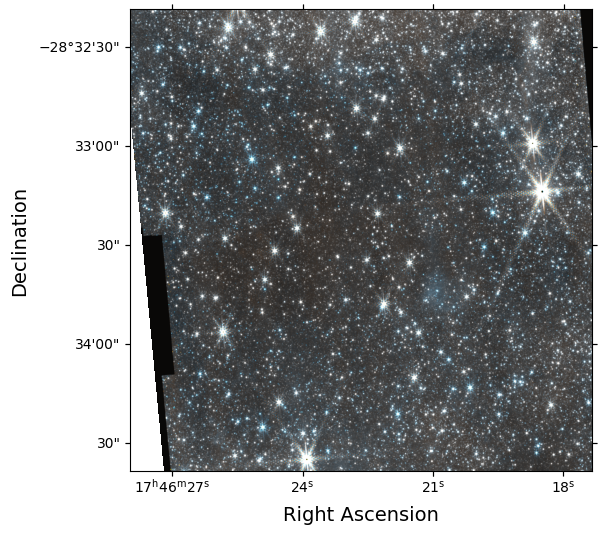

In [9]:
fig = plt.figure(figsize=(8, 6))
ax = plt.subplot(projection=cutout_ice_cloudd_ww)
ax.imshow(cutout_ice_cloudd.data)
ax.set_xlabel('Right Ascension', fontsize=14)
ax.set_ylabel('Declination', fontsize=14)

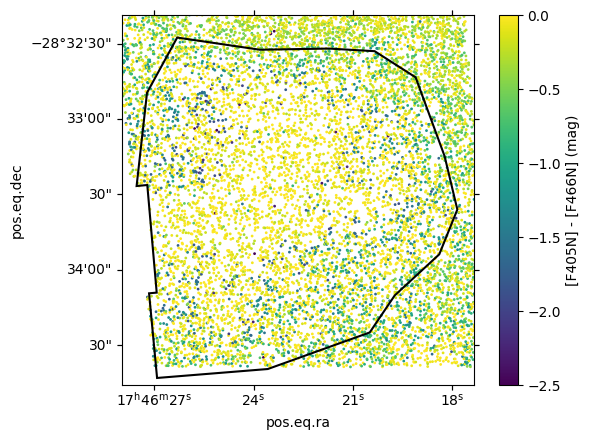

In [10]:
ax = plt.subplot(projection=cutout_ice_cloudd_ww)
ax.imshow(cutout_cloudd_nan)
im = ax.scatter(cat_cloudd.ra, cat_cloudd.dec, s=1, c=cat_cloudd.color('f405n', 'f466n'), cmap='viridis', vmin=-2.5, vmax=0, transform=ax.get_transform('world'))
reg_d_ice[0].to_pixel(cutout_ice_cloudd_ww).plot(ax=ax, edgecolor='k', facecolor='none', lw=1.5)
plt.colorbar(im, ax=ax, label='[F405N] - [F466N] (mag)')

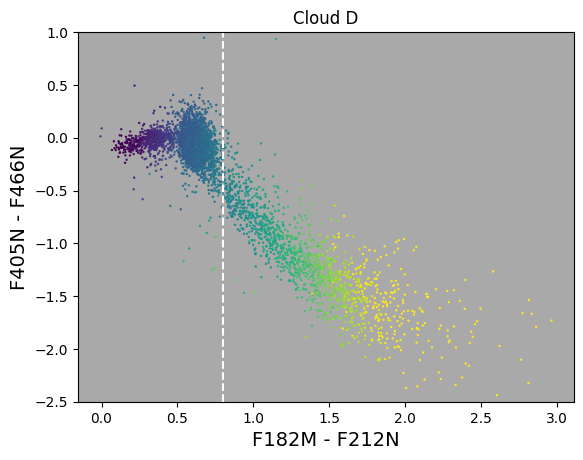

In [11]:
ax1 = plt.subplot(111)
ax1.set_facecolor('darkgrey')
cat_d_ice.plot_CCD('F182M', 'F212N', 'F405N', 'F466N', c=cat_d_ice.color('f182m', 'f410m'), ax=ax1, s=0.5, cmap='viridis', vmin=0.55, vmax=4.5)
ax1.set_xlabel('F182M - F212N', fontsize=14)
ax1.set_ylabel('F405N - F466N', fontsize=14)
ax1.set_ylim(-2.5, 1)
ax1.set_title('Cloud D')
ax1.axvline(0.8, color='white', linestyle='--')

## Barebones

In [12]:
reg_d_restricted = Regions.read('/orange/adamginsburg/jwst/cloudc/regions_/cloudd_restricted.reg')


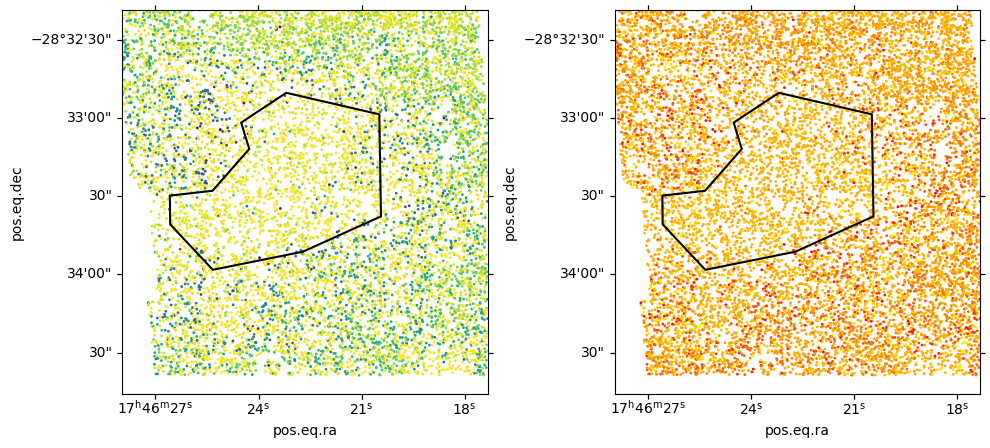

In [13]:
fig = plt.figure(figsize=(10, 5))

ax = plt.subplot(121, projection=cutout_ice_cloudd_ww)
ax.imshow(cutout_cloudd_nan)
im = ax.scatter(cat_cloudd.ra, cat_cloudd.dec, s=1, c=cat_cloudd.color('f405n', 'f466n'), cmap='viridis', vmin=-2.5, vmax=0, transform=ax.get_transform('world'))
#cat_cloudc.plot_position(ax=ax, transform=ax.get_transform('world'), s=1, c=cat_cloudc.color('f405n', 'f466n'), cmap='viridis', vmin=-2.5, vmax=0)
reg_d_restricted[0].to_pixel(cutout_ice_cloudd_ww).plot(ax=ax, edgecolor='k', facecolor='none', lw=1.5)
#plt.colorbar(im, ax=ax, label='[F405N] - [F466N] (mag)')

ax = plt.subplot(122, projection=cutout_ice_cloudd_ww)
ax.imshow(cutout_cloudd_nan)
im = ax.scatter(cat_cloudd.ra, cat_cloudd.dec, s=1, c=cat_cloudd.color('f187n', 'f405n'), cmap='autumn_r', vmin=0.5, vmax=4.5, transform=ax.get_transform('world'))
#cat_cloudc.plot_position(ax=ax, transform=ax.get_transform('world'), s=1, c=cat_cloudc.color('f405n', 'f466n'), cmap='viridis', vmin=-2.5, vmax=0)
reg_d_restricted[0].to_pixel(cutout_ice_cloudd_ww).plot(ax=ax, edgecolor='k', facecolor='none', lw=1.5)
plt.tight_layout()

In [14]:
cat_d_restricted = JWSTCatalog(cat_use.table_region_mask(reg_d_restricted, cutout_cloudd.wcs))


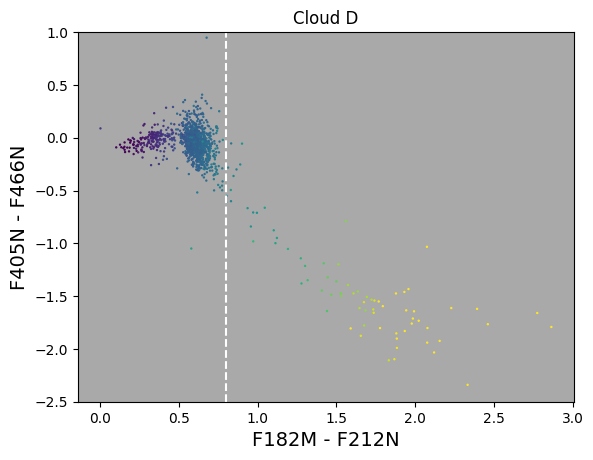

In [15]:
ax1 = plt.subplot(111)
ax1.set_facecolor('darkgrey')
cat_d_restricted.plot_CCD('F182M', 'F212N', 'F405N', 'F466N', c=cat_d_restricted.color('f182m', 'f410m'), ax=ax1, s=0.5, cmap='viridis', vmin=0.55, vmax=4.5)
ax1.set_xlabel('F182M - F212N', fontsize=14)
ax1.set_ylabel('F405N - F466N', fontsize=14)
ax1.set_ylim(-2.5, 1)
ax1.set_title('Cloud D')
ax1.axvline(0.8, color='white', linestyle='--')